In [5]:
!pip install pyforest

In [6]:
import pyforest

In [7]:
data = pd.read_csv('/content/Crop_recommendation.csv')

<IPython.core.display.Javascript object>

In [8]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
data.describe(include='object')

,label
count,2200
unique,22
top,rice
freq,100


In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
px.bar(data,x='label',y='N',title='Nitrogen levels for labels')

<IPython.core.display.Javascript object>

In [14]:
N_chemical=data.groupby('label')['N'].mean().reset_index()

In [15]:
N_chemical

,label,N
0,apple,20.80
1,banana,100.23
2,blackgram,40.02
3,chickpea,40.09
4,coconut,21.98
5,coffee,101.20
6,cotton,117.77
7,grapes,23.18
8,jute,78.40
9,kidneybeans,20.75


In [16]:
px.bar(N_chemical,x='label',y='N',title='Nitrogen MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [17]:
Ph_chemical=data.groupby('label')['P'].mean().reset_index()

In [18]:
Ph_chemical

,label,P
0,apple,134.22
1,banana,82.01
2,blackgram,67.47
3,chickpea,67.79
4,coconut,16.93
5,coffee,28.74
6,cotton,46.24
7,grapes,132.53
8,jute,46.86
9,kidneybeans,67.54


In [19]:
px.bar(Ph_chemical,x='label',y='P',title='Phosphorus MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [20]:
K_chemical=data.groupby('label')['K'].mean().reset_index()

In [21]:
K_chemical

,label,K
0,apple,199.89
1,banana,50.05
2,blackgram,19.24
3,chickpea,79.92
4,coconut,30.59
5,coffee,29.94
6,cotton,19.56
7,grapes,200.11
8,jute,39.99
9,kidneybeans,20.05


In [22]:
px.bar(K_chemical,x='label',y='K',title='Potassium MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [23]:
temperature=data.groupby('label')['temperature'].mean().reset_index()

In [24]:
temperature

,label,temperature
0,apple,22.630942
1,banana,27.376798
2,blackgram,29.973340
3,chickpea,18.872847
4,coconut,27.409892
5,coffee,25.540477
6,cotton,23.988958
7,grapes,23.849575
8,jute,24.958376
9,kidneybeans,20.115085


In [25]:
px.bar(temperature,x='label',y='temperature',title='Temperature MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [26]:
humidity=data.groupby('label')['humidity'].mean().reset_index()

In [27]:
humidity

,label,humidity
0,apple,92.333383
1,banana,80.358123
2,blackgram,65.118426
3,chickpea,16.860439
4,coconut,94.844272
5,coffee,58.869846
6,cotton,79.843474
7,grapes,81.875228
8,jute,79.639864
9,kidneybeans,21.605357


In [28]:
px.bar(humidity,x='label',y='humidity',title='Humidity MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [29]:
ph=data.groupby('label')['ph'].mean().reset_index()

In [30]:
ph

,label,ph
0,apple,5.929663
1,banana,5.983893
2,blackgram,7.133952
3,chickpea,7.336957
4,coconut,5.976562
5,coffee,6.790308
6,cotton,6.912675
7,grapes,6.025937
8,jute,6.732778
9,kidneybeans,5.749411


In [31]:
px.bar(ph,x='label',y='ph',title='ph MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

In [32]:
rainfall=data.groupby('label')['rainfall'].mean().reset_index()

In [33]:
rainfall

,label,rainfall
0,apple,112.654779
1,banana,104.626980
2,blackgram,67.884151
3,chickpea,80.058977
4,coconut,175.686646
5,coffee,158.066295
6,cotton,80.398043
7,grapes,69.611829
8,jute,174.792798
9,kidneybeans,105.919778


In [34]:
px.bar(rainfall,x='label',y='rainfall',title='Rainfall MEAN for crop growth',text_auto=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

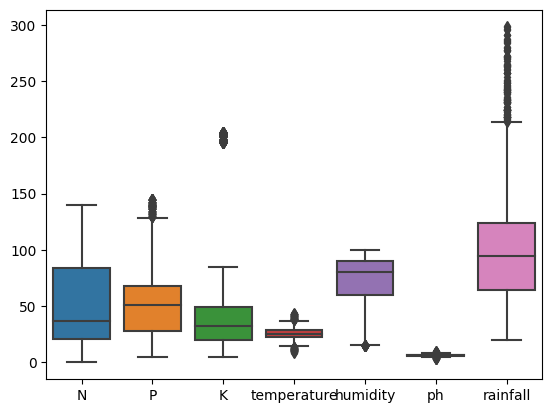

In [35]:
sns.boxplot(data)

From above EDA we can say that every crop has its own set of requirements to grow completely.


*   Rice is one of the major crop grown. This requires highest water supply when compared with other crops. So the mean raifall is higher for rice.
*   The temperature for apple crop is usually less when compared with other crops.
*   The Phosporous and Potassium are essential and important chemicals to cultivate crops like apple and grapes.
*  Chickpea and Kidney beans are crops that reqires the locations with less humidity to be grown when compared with other crops.



